In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
import plotly.express as px

In [42]:
url = ('time_series_covid19_confirmed_US_unpivot.csv')
data = pd.read_csv( url )

In [43]:
data.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Death_Cases
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,"American Samoa, US",2020-01-22,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,"Guam, US",2020-01-22,0
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,"Northern Mariana Islands, US",2020-01-22,0
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,"Puerto Rico, US",2020-01-22,0
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,"Virgin Islands, US",2020-01-22,0


In [44]:
data = data[data["Date"]>= '2020-03-20']

In [45]:
data.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Death_Cases
189138,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,"American Samoa, US",2020-03-20,0
189139,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,"Guam, US",2020-03-20,14
189140,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,"Northern Mariana Islands, US",2020-03-20,0
189141,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,"Puerto Rico, US",2020-03-20,14
189142,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,"Virgin Islands, US",2020-03-20,3


In [46]:
data.tail()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Death_Cases
538060,84070016,US,USA,840,NaN,Central Utah,Utah,US,39.372319,-111.575868,"Central Utah, Utah, US",2020-07-04,201
538061,84070017,US,USA,840,NaN,Southeast Utah,Utah,US,38.996171,-110.701396,"Southeast Utah, Utah, US",2020-07-04,40
538062,84070018,US,USA,840,NaN,Southwest Utah,Utah,US,37.854472,-111.441876,"Southwest Utah, Utah, US",2020-07-04,1660
538063,84070019,US,USA,840,NaN,TriCounty,Utah,US,40.124915,-109.517442,"TriCounty, Utah, US",2020-07-04,55
538064,84070020,US,USA,840,NaN,Weber-Morgan,Utah,US,41.271160,-111.914512,"Weber-Morgan, Utah, US",2020-07-04,1172


In [47]:
data.copy().drop(['UID', 'iso2', 'iso3', 'code3'],axis =1)

,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Death_Cases
189138,60.0,NaN,American Samoa,US,-14.271000,-170.132000,"American Samoa, US",2020-03-20,0
189139,66.0,NaN,Guam,US,13.444300,144.793700,"Guam, US",2020-03-20,14
189140,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,"Northern Mariana Islands, US",2020-03-20,0
189141,72.0,NaN,Puerto Rico,US,18.220800,-66.590100,"Puerto Rico, US",2020-03-20,14
189142,78.0,NaN,Virgin Islands,US,18.335800,-64.896300,"Virgin Islands, US",2020-03-20,3
...,...,...,...,...,...,...,...,...,...
538060,NaN,Central Utah,Utah,US,39.372319,-111.575868,"Central Utah, Utah, US",2020-07-04,201
538061,NaN,Southeast Utah,Utah,US,38.996171,-110.701396,"Southeast Utah, Utah, US",2020-07-04,40
538062,NaN,Southwest Utah,Utah,US,37.854472,-111.441876,"Southwest Utah, Utah, US",2020-07-04,1660
538063,NaN,TriCounty,Utah,US,40.124915,-109.517442,"TriCounty, Utah, US",2020-07-04,55


In [48]:
data = data.drop(['UID', 'iso2', 'iso3', 'code3'],axis =1)

In [49]:
data

,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Death_Cases
189138,60.0,NaN,American Samoa,US,-14.271000,-170.132000,"American Samoa, US",2020-03-20,0
189139,66.0,NaN,Guam,US,13.444300,144.793700,"Guam, US",2020-03-20,14
189140,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,"Northern Mariana Islands, US",2020-03-20,0
189141,72.0,NaN,Puerto Rico,US,18.220800,-66.590100,"Puerto Rico, US",2020-03-20,14
189142,78.0,NaN,Virgin Islands,US,18.335800,-64.896300,"Virgin Islands, US",2020-03-20,3
...,...,...,...,...,...,...,...,...,...
538060,NaN,Central Utah,Utah,US,39.372319,-111.575868,"Central Utah, Utah, US",2020-07-04,201
538061,NaN,Southeast Utah,Utah,US,38.996171,-110.701396,"Southeast Utah, Utah, US",2020-07-04,40
538062,NaN,Southwest Utah,Utah,US,37.854472,-111.441876,"Southwest Utah, Utah, US",2020-07-04,1660
538063,NaN,TriCounty,Utah,US,40.124915,-109.517442,"TriCounty, Utah, US",2020-07-04,55


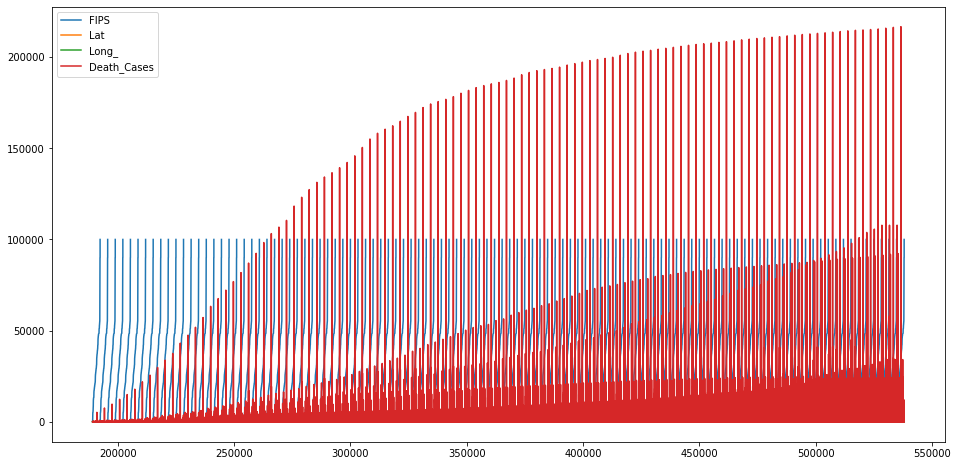

In [50]:
# plot all of the data for the specified state
data.plot(figsize=(16,8))
plt.show()

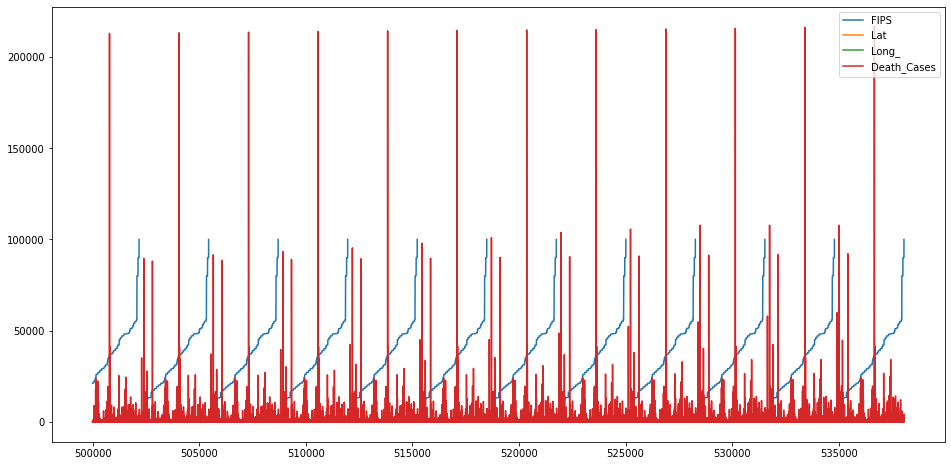

In [59]:
# plot just april data for the specified state
data.loc['5/1/20':,:].plot(figsize=(16,8))
plt.show()

In [92]:
# display the first 5 row of the filtered dataframe again
data.head(12)

,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Death_Cases
189138,60.0,NaN,American Samoa,US,-14.271000,-170.132000,"American Samoa, US",2020-03-20,0
189139,66.0,NaN,Guam,US,13.444300,144.793700,"Guam, US",2020-03-20,14
189140,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,"Northern Mariana Islands, US",2020-03-20,0
189141,72.0,NaN,Puerto Rico,US,18.220800,-66.590100,"Puerto Rico, US",2020-03-20,14
189142,78.0,NaN,Virgin Islands,US,18.335800,-64.896300,"Virgin Islands, US",2020-03-20,3
189143,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",2020-03-20,0
189144,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",2020-03-20,2
189145,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",2020-03-20,0
189146,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",2020-03-20,0
189147,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",2020-03-20,0


In [108]:
px.bar(
    data.head(60),
    x = "Admin2",
    y = "Death_Cases",
    title= "Top 10 worst affected countries", # the axis names
    color_discrete_sequence=["pink"], 
    height=500,
    width=800
)

In [109]:
px.bar(
    data.head(8),
    x = "Province_State",
    y = "Death_Cases",
    title= "Top 10 worst affected State", # the axis names
    color_discrete_sequence=["pink"], 
    height=500,
    width=800
)

In [106]:
px.bar(
    data.head(60),
    x = "Country_Region",
    y = "Death_Cases",
    title= "Top 10 worst affected countries", # the axis names
    color_discrete_sequence=["pink"], 
    height=500,
    width=800
)

In [ ]:
'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'